In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
#read application data
app_data = pd.read_csv('application_data.csv')
#read customer previous application data
prev_data = pd.read_csv('previous_application.csv')


In [3]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
prev_data["NAME_CONTRACT_STATUS"].value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

In [5]:
#Handling null values. 
#calculate the percentage of null values in columns.
# Drop the columns with more than 30% of null values.

cols_null = prev_data.isnull().sum()/len(app_data)*100
cols_null = cols_null[cols_null.values > 30.0]
print(len(cols_null))
print(cols_null)

14
AMT_ANNUITY                  121.047702
AMT_DOWN_PAYMENT             291.320961
AMT_GOODS_PRICE              125.366247
RATE_DOWN_PAYMENT            291.320961
RATE_INTEREST_PRIMARY        541.204380
RATE_INTEREST_PRIVILEGED     541.204380
NAME_TYPE_SUITE              266.788830
CNT_PAYMENT                  121.046076
DAYS_FIRST_DRAWING           218.875097
DAYS_FIRST_DUE               218.875097
DAYS_LAST_DUE_1ST_VERSION    218.875097
DAYS_LAST_DUE                218.875097
DAYS_TERMINATION             218.875097
NFLAG_INSURED_ON_APPROVAL    218.875097
dtype: float64


In [6]:
# fetch the columns with 30% or more null values.
cols_null = list(cols_null[cols_null.values > 30.0].index)
cols_null

['AMT_ANNUITY',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [7]:
# Drop the columns:
prev_data.drop(columns=cols_null,axis=1,inplace=True)

In [8]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [9]:
prev_data.shape

(1670214, 23)

Note: "Only AMT_CREDIT" & "PRODUCT_COMBINATION" column seems to have null values and number is very low.

In [10]:
# Checking few categorical columns for null values.
prev_data.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [11]:
# Following the rule to drop rows if more than 30% contains null values.
prev_data = prev_data[-prev_data['NAME_CASH_LOAN_PURPOSE'].isin(['XAP','XNA'])]

In [12]:
# Check data
prev_data.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [13]:
prev_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans    69635
Name: NAME_CONTRACT_TYPE, dtype: int64

In [14]:
prev_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        63835
XNA                                           5416
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

##### Replace XNA with most occuring value

In [15]:
payment_type = prev_data.NAME_PAYMENT_TYPE.mode()[0]
payment_type
prev_data.NAME_PAYMENT_TYPE = prev_data.NAME_PAYMENT_TYPE.replace('XNA',payment_type)

In [16]:
prev_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        69251
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

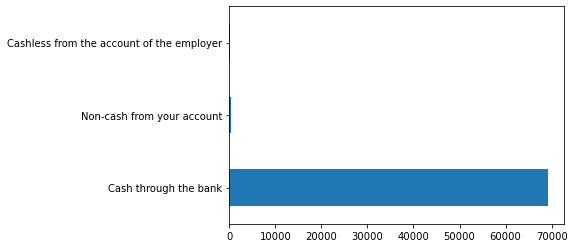

In [17]:
prev_data.NAME_PAYMENT_TYPE.value_counts().plot.barh()
plt.show()

In [18]:
prev_data.NAME_CLIENT_TYPE.value_counts() 

Repeater     56256
New           9964
Refreshed     3362
XNA             53
Name: NAME_CLIENT_TYPE, dtype: int64

In [19]:
# Replace XNA with most occuring value --- see if it can be replaced with repeater.
client_type = prev_data.NAME_CLIENT_TYPE.mode()[0]
prev_data.NAME_CLIENT_TYPE = prev_data.NAME_CLIENT_TYPE.replace('XNA',client_type)

In [20]:
prev_data.NAME_CLIENT_TYPE.value_counts() 

Repeater     56309
New           9964
Refreshed     3362
Name: NAME_CLIENT_TYPE, dtype: int64

In [21]:
prev_data.NAME_CONTRACT_STATUS.value_counts() 

Refused         40858
Approved        26933
Canceled         1639
Unused offer      205
Name: NAME_CONTRACT_STATUS, dtype: int64

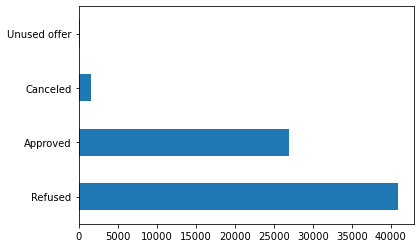

In [22]:
prev_data.NAME_CONTRACT_STATUS.value_counts().plot.barh()
plt.show()

# Bivariate Analysis

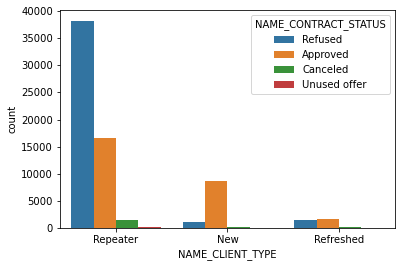

In [23]:
# Create a bi-variate analysis for different contract Status Vs client type
sns.countplot(x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', data=prev_data)

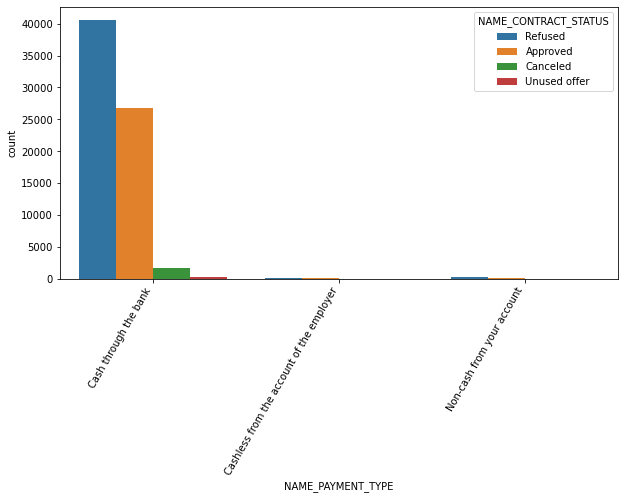

In [24]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='NAME_PAYMENT_TYPE', hue='NAME_CONTRACT_STATUS', data=prev_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

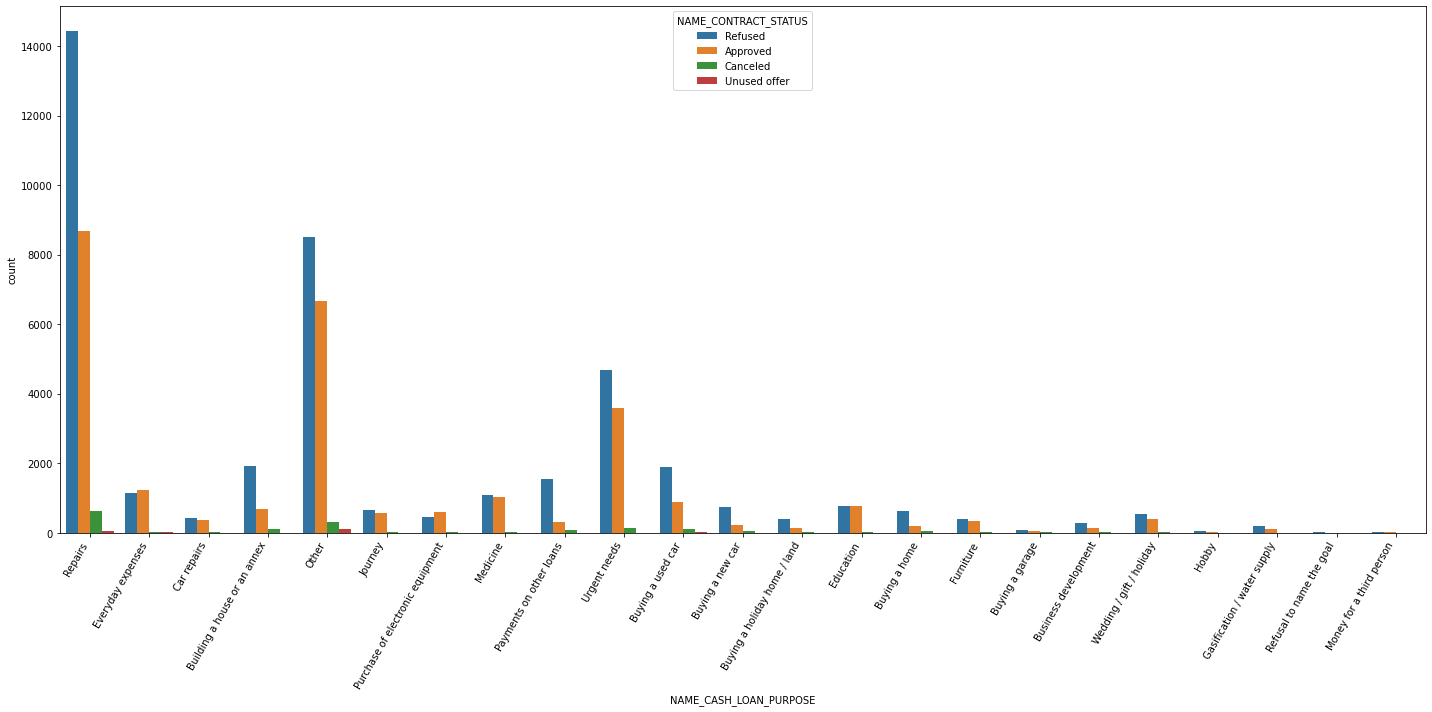

In [25]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', data=prev_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

# Merging Current & Previous application Data

In [26]:
#cust_data = app_data
cust_data = app_data.merge(prev_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [27]:
#check the information about datatypes and null values
cust_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 144 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    59413 non-null  int64  
 1   TARGET                        59413 non-null  int64  
 2   NAME_CONTRACT_TYPE_           59413 non-null  object 
 3   CODE_GENDER                   59413 non-null  object 
 4   FLAG_OWN_CAR                  59413 non-null  object 
 5   FLAG_OWN_REALTY               59413 non-null  object 
 6   CNT_CHILDREN                  59413 non-null  int64  
 7   AMT_INCOME_TOTAL              59413 non-null  float64
 8   AMT_CREDIT_                   59413 non-null  float64
 9   AMT_ANNUITY                   59406 non-null  float64
 10  AMT_GOODS_PRICE               59354 non-null  float64
 11  NAME_TYPE_SUITE               59218 non-null  object 
 12  NAME_INCOME_TYPE              59413 non-null  object 
 13  

In [28]:
#check top 5 rows of this combined dataset
cust_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low


In [29]:
cust_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 144 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    59413 non-null  int64  
 1   TARGET                        59413 non-null  int64  
 2   NAME_CONTRACT_TYPE_           59413 non-null  object 
 3   CODE_GENDER                   59413 non-null  object 
 4   FLAG_OWN_CAR                  59413 non-null  object 
 5   FLAG_OWN_REALTY               59413 non-null  object 
 6   CNT_CHILDREN                  59413 non-null  int64  
 7   AMT_INCOME_TOTAL              59413 non-null  float64
 8   AMT_CREDIT_                   59413 non-null  float64
 9   AMT_ANNUITY                   59406 non-null  float64
 10  AMT_GOODS_PRICE               59354 non-null  float64
 11  NAME_TYPE_SUITE               59218 non-null  object 
 12  NAME_INCOME_TYPE              59413 non-null  object 
 13  

In [30]:
Loan_purpose = pd.DataFrame(cust_data.groupby(['NAME_CASH_LOAN_PURPOSE'])['TARGET'].value_counts())
Loan_purpose 

TARGET
NAME_CASH_LOAN_PURPOSE           TARGET        
Building a house or an annex     0         2020
                                 1          324
Business development             0          313
                                 1           46
Buying a garage                  0          109
                                 1            7
Buying a holiday home / land     0          408
                                 1           55
Buying a home                    0          617
                                 1           84
Buying a new car                 0          806
                                 1           80
Buying a used car                0         2151
                                 1          318
Car repairs                      0          564
                                 1          127
Education                        0         1194
                                 1          140
Everyday expenses                0         1836
                                 1          216
Furniture                        0          575
                                 1           85
Gasification / water supply      0          206
                                 1           45
Hobby                            0           36
                                 1            9
Journey                          0          931
                                 1          111
Medicine                         0         1620
                                 1          251
Money for a third person         0           19
                                 1            4
Other                            0        11759
                                 1         1673
Payments on other loans          0         1321
                                 1          252
Purchase of electronic equipment 0          817
                                 1          117
Refusal to name the goal         0           10
                                 1            3
Repairs                          0        17501
                                 1         2616
Urgent needs                     0         6154
                                 1         1082
Wedding / gift / holiday         0          707
                                 1           94

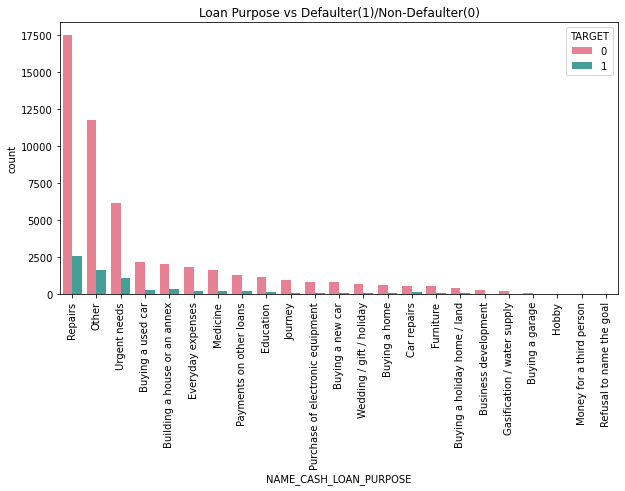

In [31]:
plt.figure(figsize = (10,5))
sns.countplot(data = cust_data, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=cust_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='husl') 
plt.xticks(rotation=90)
plt.title('Loan Purpose vs Defaulter(1)/Non-Defaulter(0)')
plt.show()

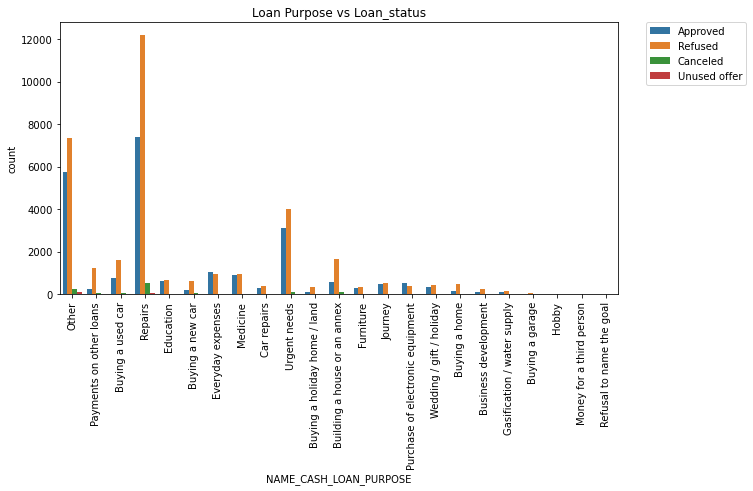

In [32]:
# Purpose of loans vs Loan status
plt.figure(figsize = (10,5))
sns.countplot(data = cust_data, x= 'NAME_CASH_LOAN_PURPOSE',hue = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Loan Purpose vs Loan_status')
plt.show()

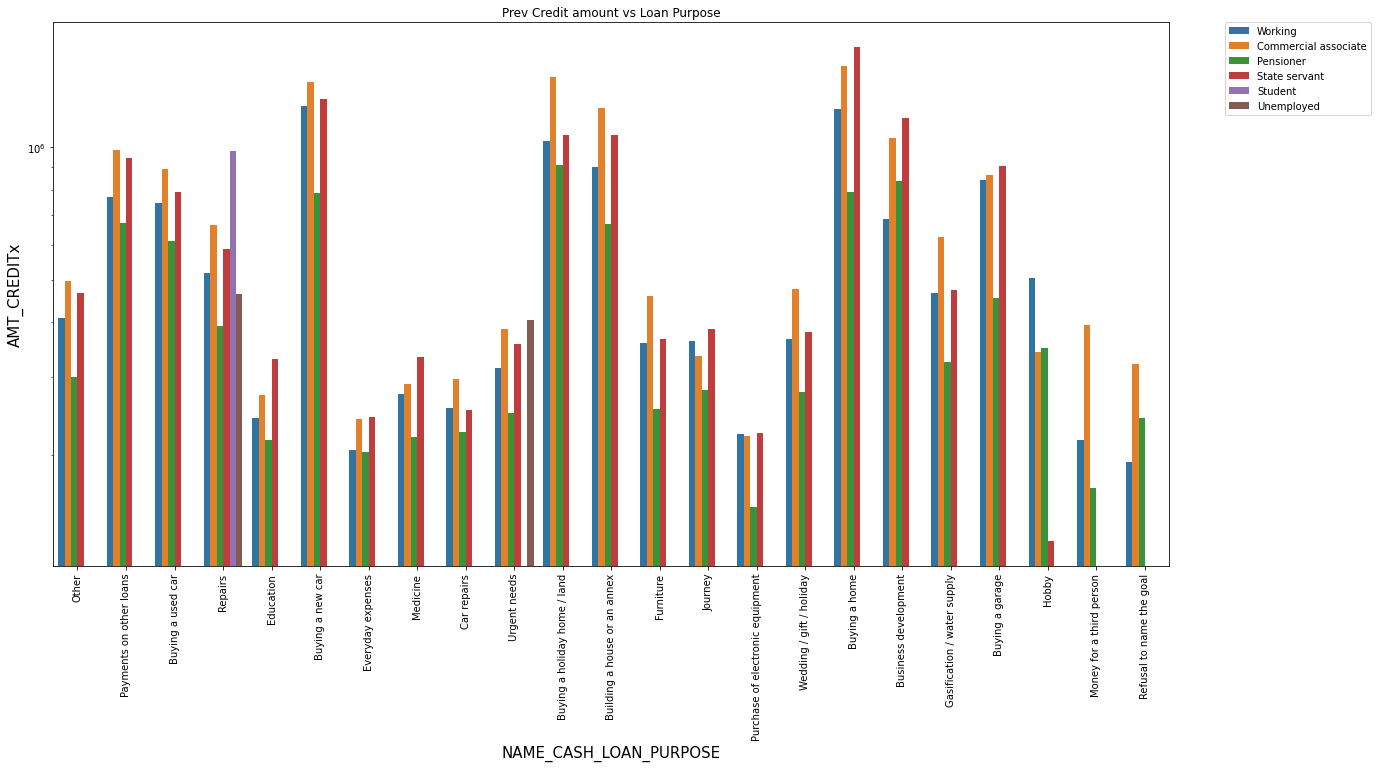

In [33]:
plt.figure(figsize=(20,10))
plt.rcParams["axes.labelsize"] = 15

plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =cust_data, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDITx',orient='v', ci=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

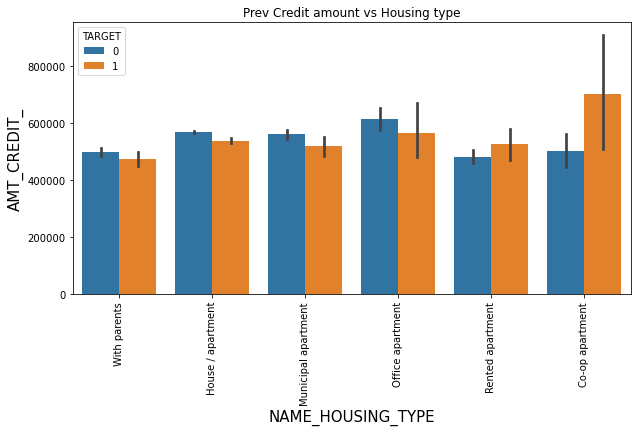

In [34]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data =cust_data, y='AMT_CREDIT_',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()